In [52]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

# __Simple Linear Regression__

- ##### Eğimi 2 ve kesişim katsayısı -5

Text(0, 0.5, 'y')

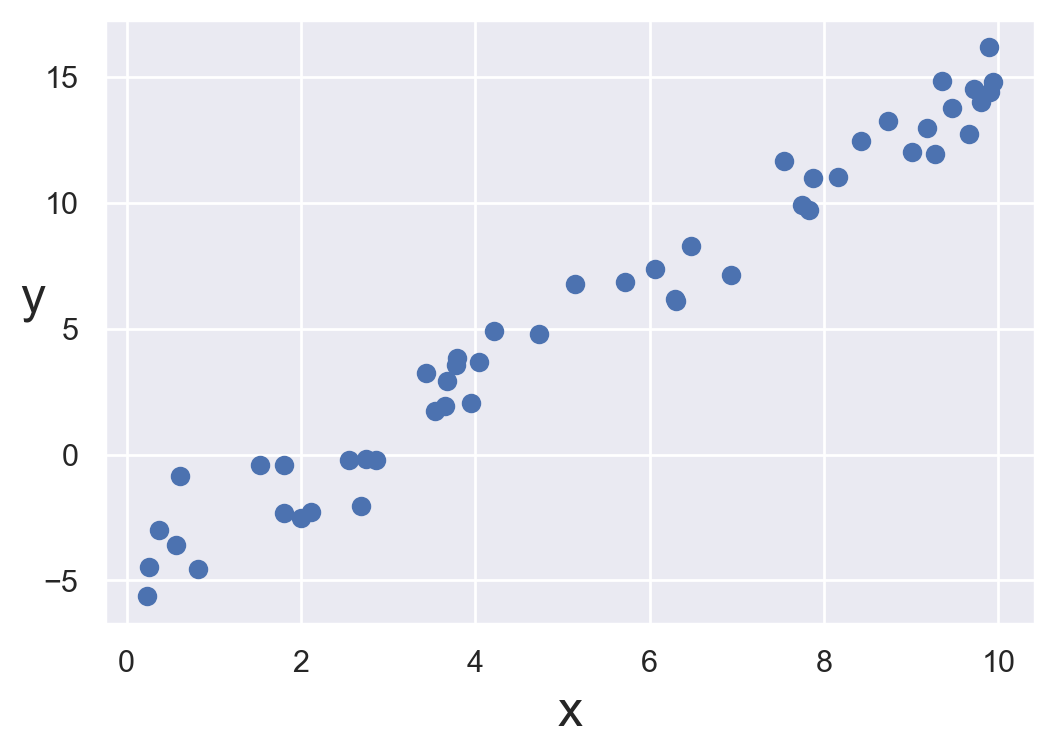

In [53]:
rng = np.random.RandomState()
x = 10 * rng.rand(50)

y = 2 * x - 5 + rng.randn(50)

plt.figure(dpi=200)
plt.scatter(x, y);
plt.xlabel('x', fontsize=18)
plt.ylabel('y', rotation=0, fontsize=18)

# print('X\n', x, '\n')
# print('y\n', y, '\n')

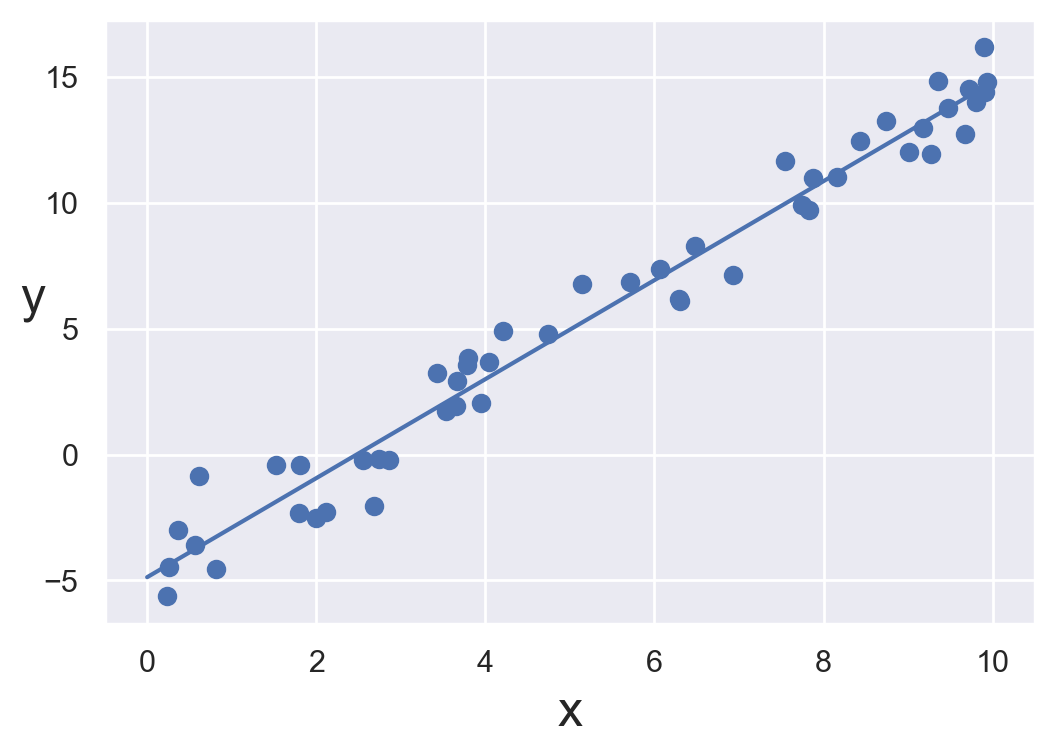

In [54]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.figure(dpi=200)
plt.scatter(x, y)
plt.xlabel('x', fontsize=18)
plt.ylabel('y', rotation=0, fontsize=18)
plt.plot(xfit, yfit);

- ##### Verilerin eğimi ve kesişimi modelin fit parametrelerinde bulunur

In [55]:
print("Model eğimi:    ", model.coef_[0])
print("Model kesişimi:", model.intercept_)

Model eğimi:     1.9650637131467013
Model kesişimi: -4.870076486408422


# __Polynomial Regression__

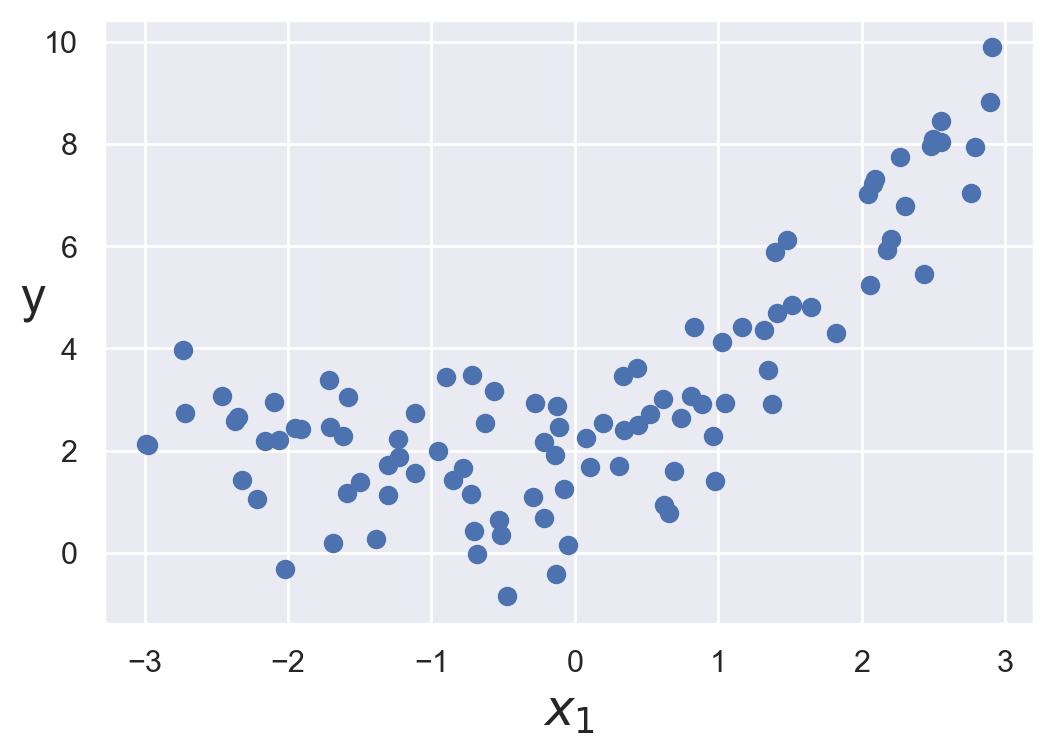

In [56]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.figure(dpi=200)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel('y', rotation=0, fontsize=18)
plt.scatter(X, y)

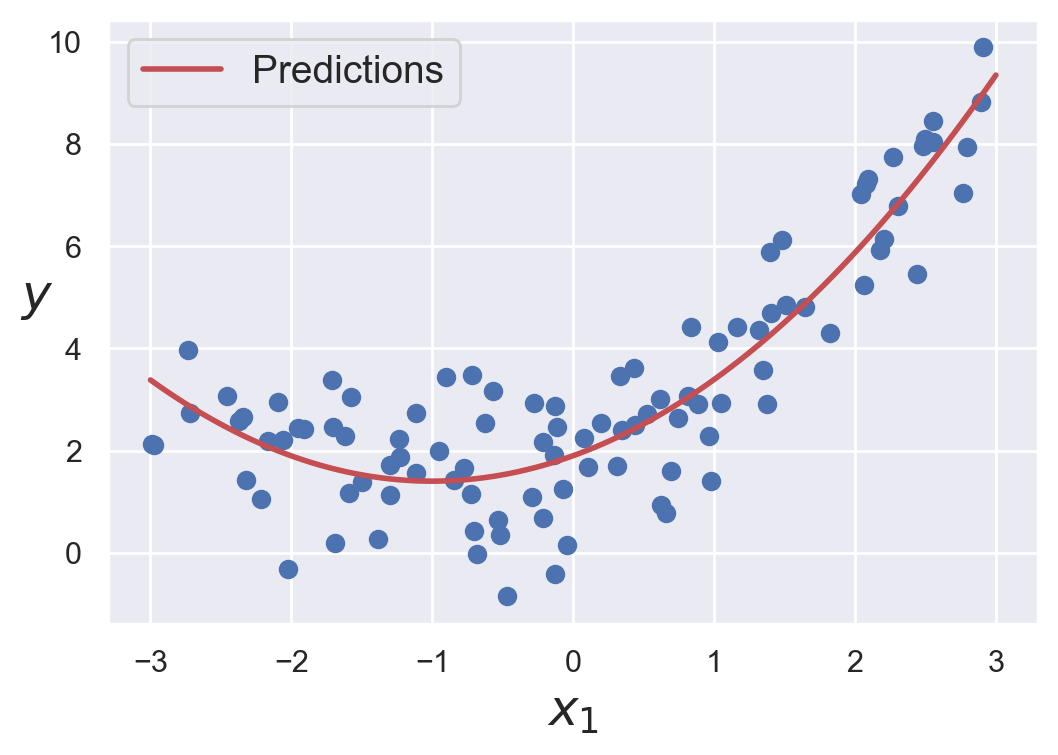

In [57]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

polynomial_regression.fit(X, y)
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
y_newbig = polynomial_regression.predict(X_new)
plt.figure(dpi=200)
plt.scatter(X, y)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.plot(X_new, y_newbig, "r-", linewidth=2, label="Predictions")
plt.legend(loc="upper left", fontsize=14)

# __Logistic Regression__

In [58]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0

In [59]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="liblinear", random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42, solver='liblinear')

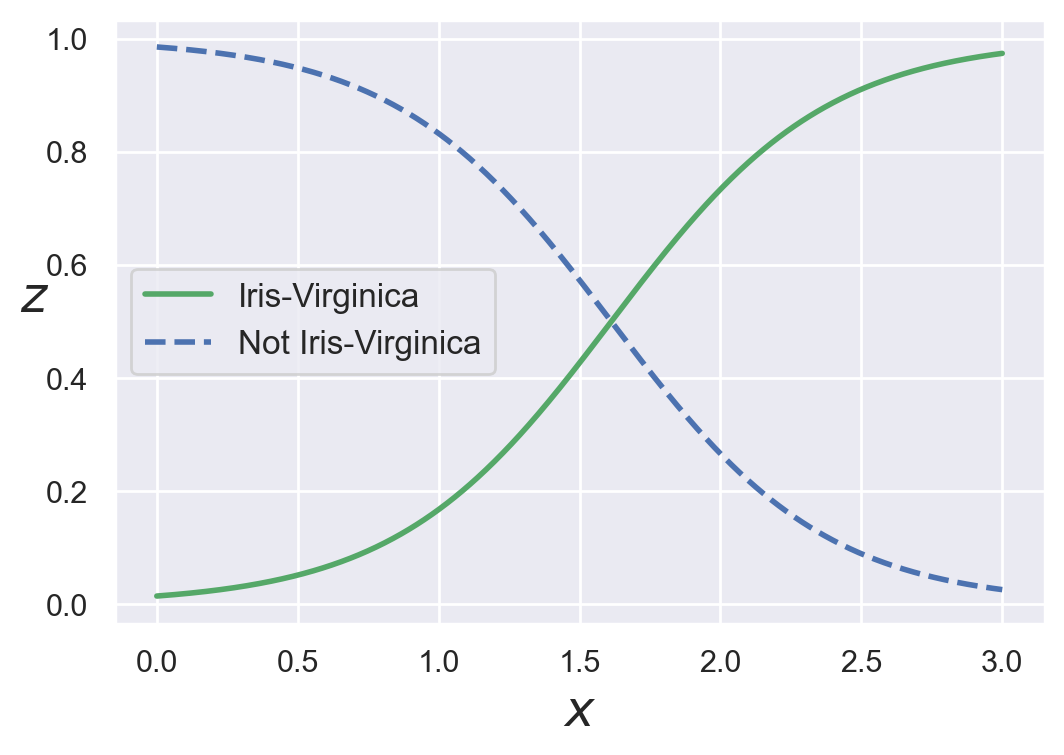

In [60]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.figure(dpi=200)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$z$", rotation=0, fontsize=18)
plt.legend(loc="center left", fontsize=12)

In [61]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

decision_boundary

array([1.61561562])

# __k-Nearest Neighbor__

In [62]:
from sklearn import datasets

wine = datasets.load_wine()
wine_data = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_data['target'] = wine['target']

wine_data.head(100)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,12.47,1.52,2.20,19.0,162.0,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937.0,1
96,11.81,2.12,2.74,21.5,134.0,1.60,0.99,0.14,1.56,2.50,0.95,2.26,625.0,1
97,12.29,1.41,1.98,16.0,85.0,2.55,2.50,0.29,1.77,2.90,1.23,2.74,428.0,1
98,12.37,1.07,2.10,18.5,88.0,3.52,3.75,0.24,1.95,4.50,1.04,2.77,660.0,1


In [63]:
print(wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3)


In [65]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [66]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6481481481481481


# __Support Vector Machines__

### Classification

In [67]:
from sklearn import datasets 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 

iris = datasets.load_iris()
iris_data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [68]:
X = iris.data 
y = iris.target
print(y)
print(iris.target_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [70]:
from sklearn.svm import SVC 
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test) 

In [71]:
svm_predictions

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [72]:
accuracy = svm_model_linear.score(X_test, y_test)
accuracy

0.9736842105263158

### Regression

In [73]:
dataset = pd.read_csv('./datasets/Position_Salaries.csv')
X = dataset.iloc[:,1:2].values.astype(float)
y = dataset.iloc[:,2:3].values.astype(float)
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [74]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)
print(X)
print(y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [75]:
from sklearn.svm import SVR

regressor = SVR(kernel='rbf')
regressor.fit(X,y)

SVR()

In [76]:
y_pred = regressor.predict([[6.5]])
y_pred

array([0.01158103])

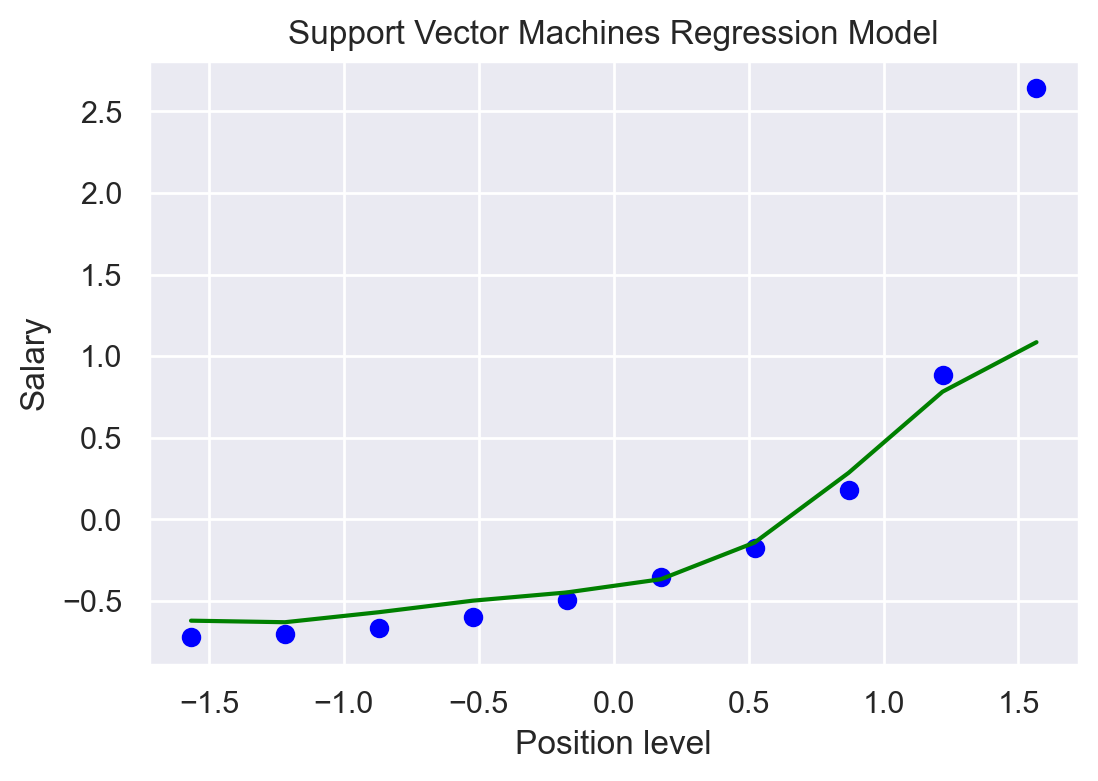

In [77]:
plt.figure(dpi=200)
plt.scatter(X, y, color = 'blue')
plt.plot(X, regressor.predict(X), color = 'green')
plt.title('Support Vector Machines Regression Model')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# __Decision Trees__

### Decision Tree Classifiers

In [104]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [105]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv("./datasets/pima-indians-diabetes.csv")
pima.columns = col_names
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [106]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [108]:
clf = DecisionTreeClassifier()

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [109]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.696969696969697


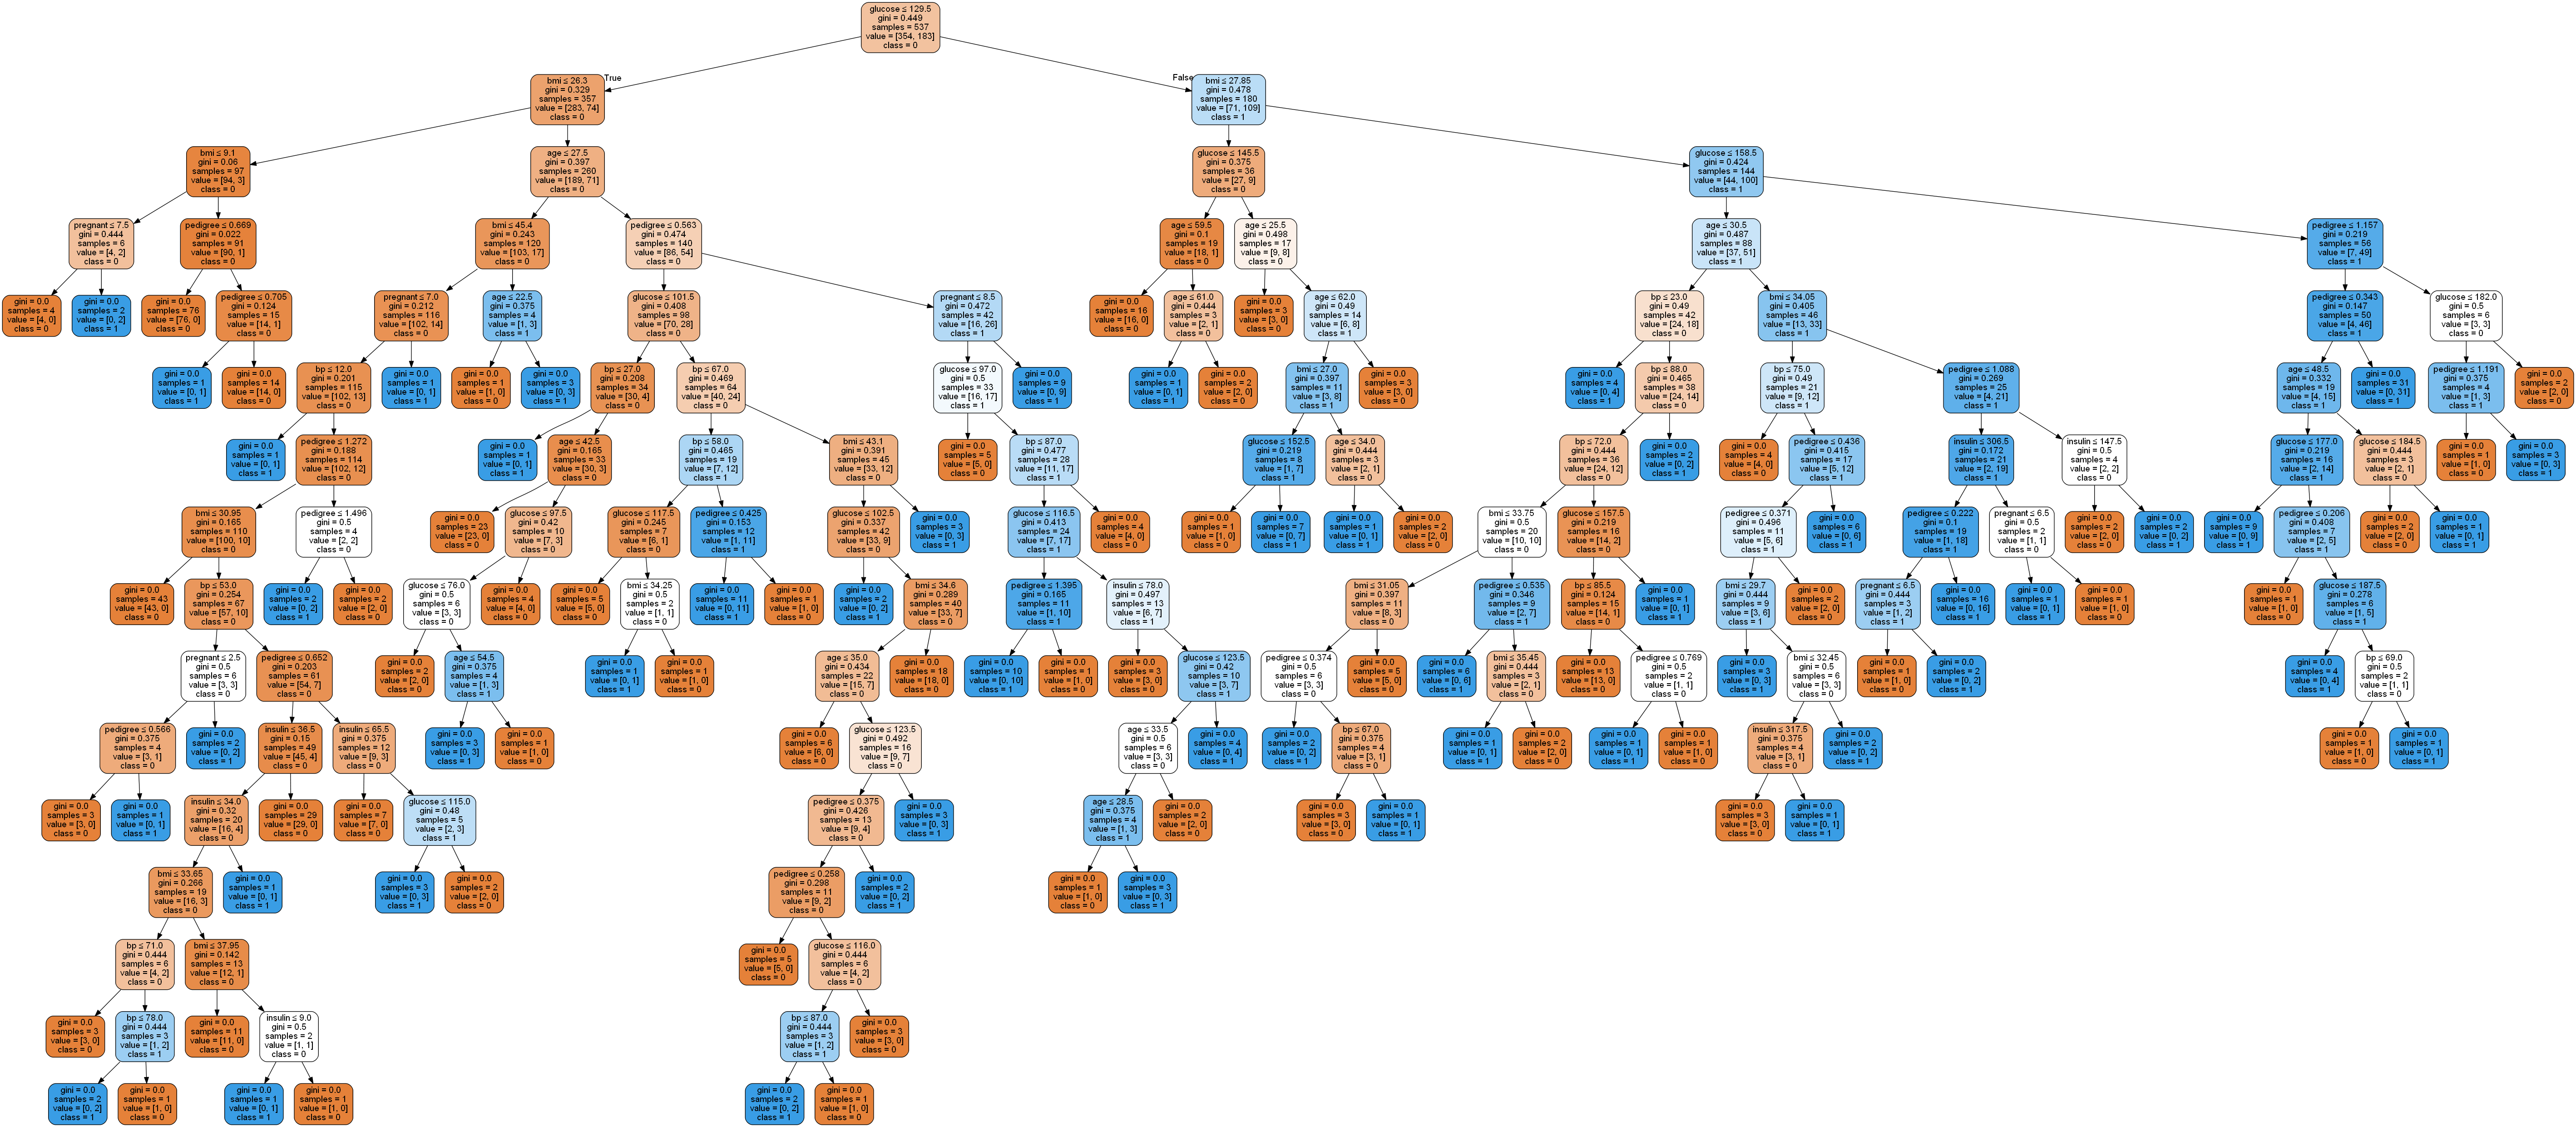

In [110]:
from sklearn.tree import export_graphviz
import six 
from IPython.display import Image  
import pydotplus

dot_data = six.StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes_1.png')
Image(graph.create_png())

In [85]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


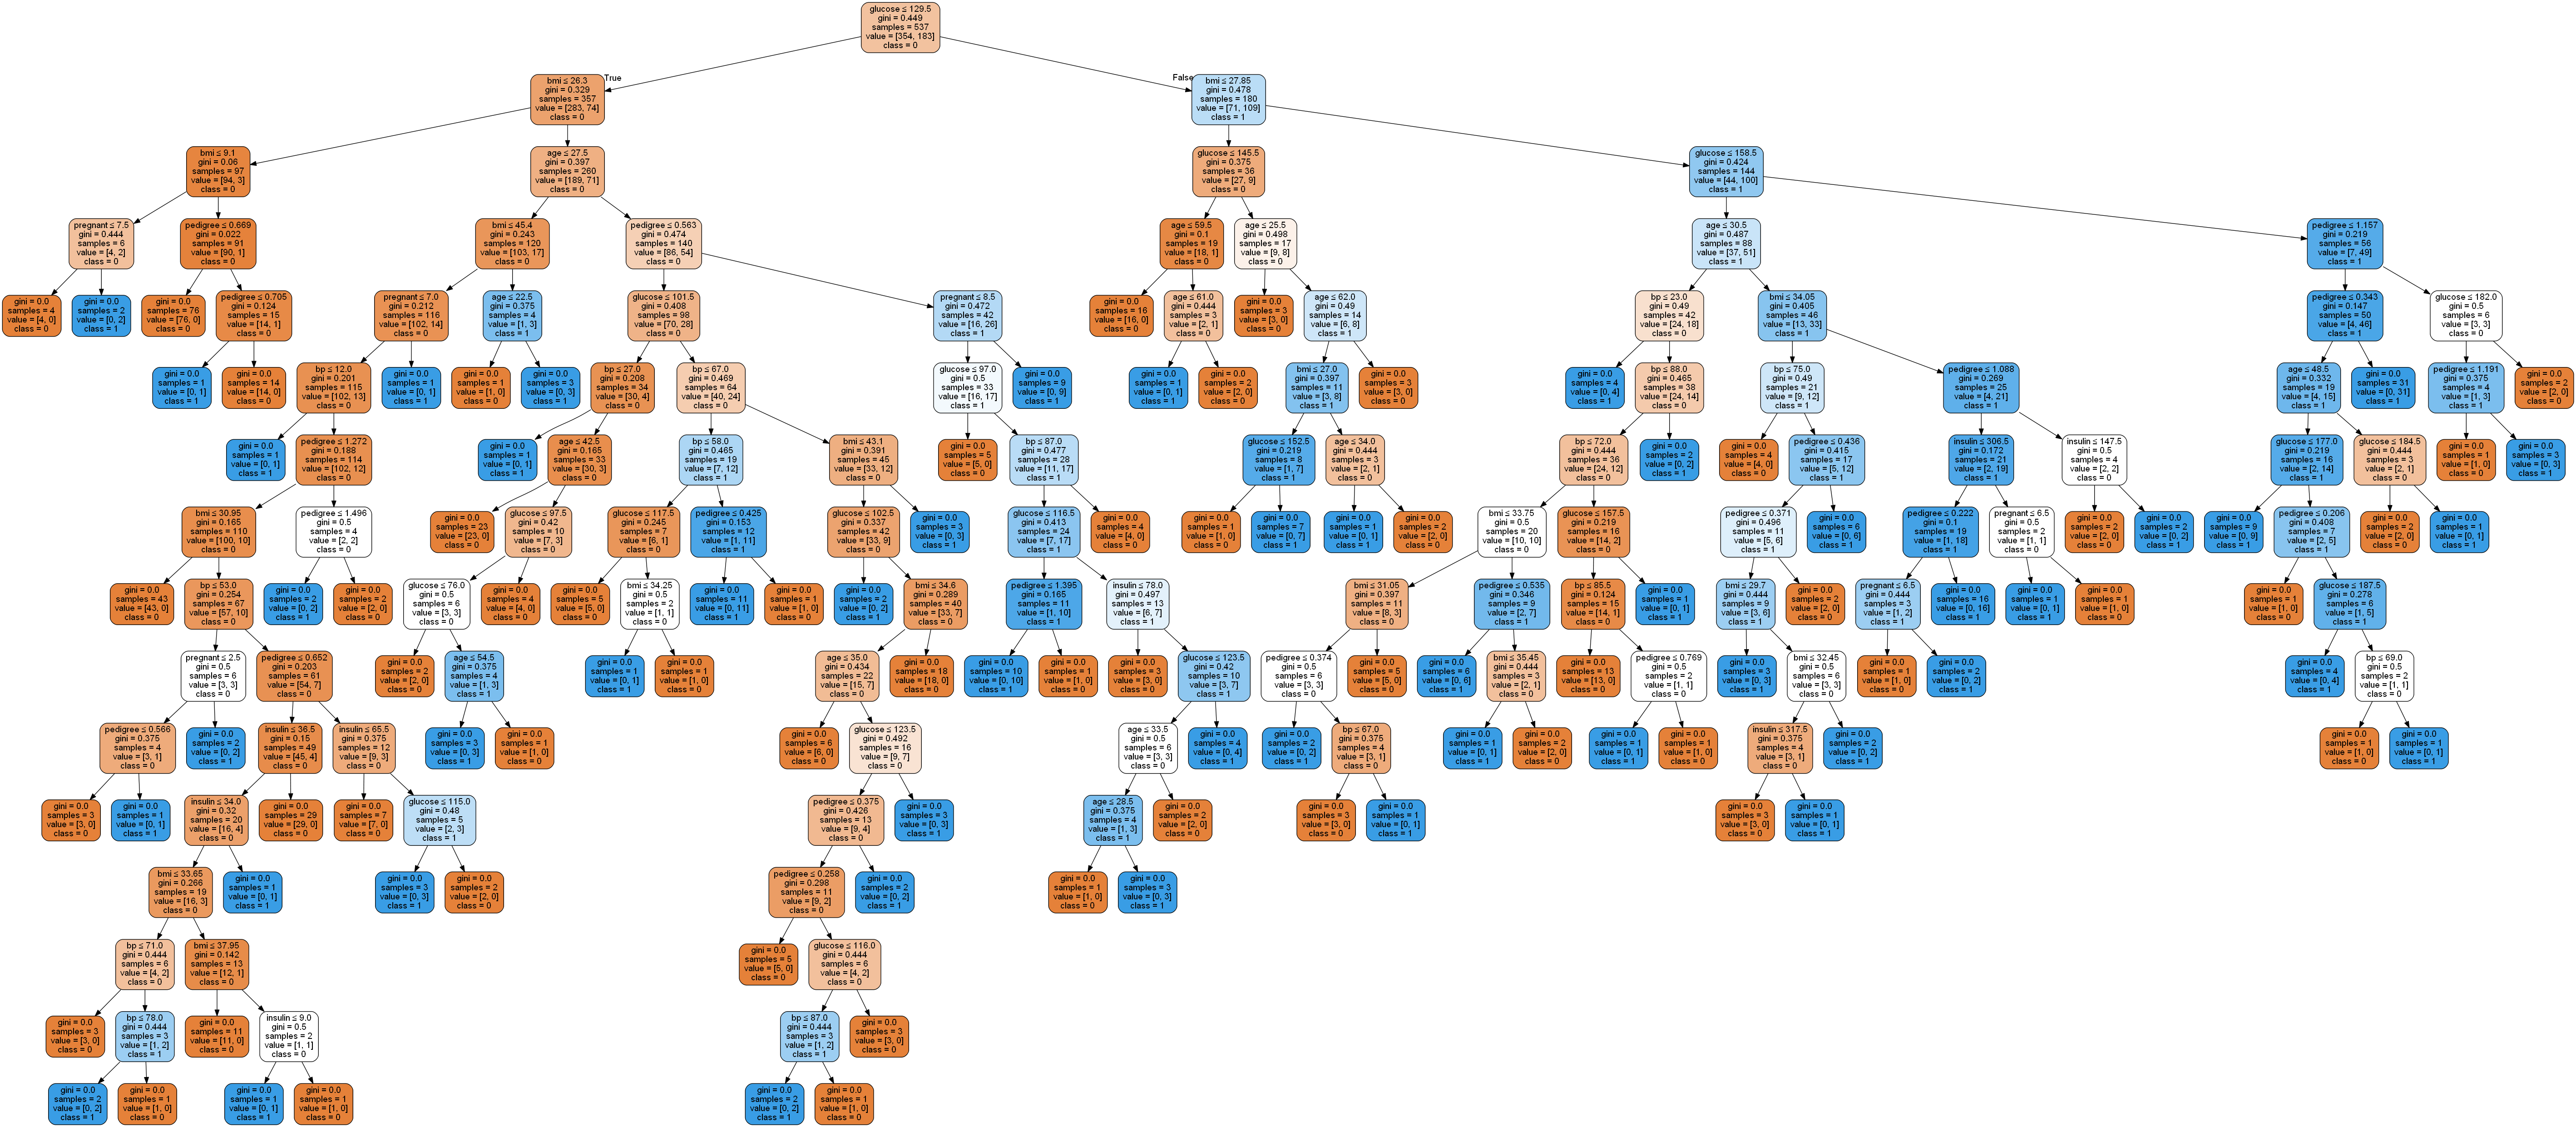

In [111]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, 
                out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, 
                feature_names = feature_cols,class_names=['0','1']
               )

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes_2.png')
Image(graph.create_png())

### Decision Tree Regressors

In [112]:
dataset = np.array(
[['Asset Flip', 100, 1000],
['Text Based', 500, 3000],
['Visual Novel', 1500, 5000],
['2D Pixel Art', 3500, 8000],
['2D Vector Art', 5000, 6500],
['Strategy', 6000, 7000],
['First Person Shooter', 8000, 15000],
['Simulator', 9500, 20000],
['Racing', 12000, 21000],
['RPG', 14000, 25000],
['Sandbox', 15500, 27000],
['Open-World', 16500, 30000],
['MMOFPS', 25000, 52000],
['MMORPG', 30000, 80000]
])

dataset

array([['Asset Flip', '100', '1000'],
       ['Text Based', '500', '3000'],
       ['Visual Novel', '1500', '5000'],
       ['2D Pixel Art', '3500', '8000'],
       ['2D Vector Art', '5000', '6500'],
       ['Strategy', '6000', '7000'],
       ['First Person Shooter', '8000', '15000'],
       ['Simulator', '9500', '20000'],
       ['Racing', '12000', '21000'],
       ['RPG', '14000', '25000'],
       ['Sandbox', '15500', '27000'],
       ['Open-World', '16500', '30000'],
       ['MMOFPS', '25000', '52000'],
       ['MMORPG', '30000', '80000']], dtype='<U20')

In [88]:
X = dataset[:,1:2].astype(int)
X

array([[  100],
       [  500],
       [ 1500],
       [ 3500],
       [ 5000],
       [ 6000],
       [ 8000],
       [ 9500],
       [12000],
       [14000],
       [15500],
       [16500],
       [25000],
       [30000]])

In [89]:
y = dataset[:,2].astype(int)
y

array([ 1000,  3000,  5000,  8000,  6500,  7000, 15000, 20000, 21000,
       25000, 27000, 30000, 52000, 80000])

In [90]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state = 0)

regressor.fit(X, y)

DecisionTreeRegressor(random_state=0)

In [91]:
y_pred = regressor.predict([[3750]])

print("Predicted price: % d\n"% y_pred)

Predicted price:  8000



In [92]:
dot_data = StringIO()
export_graphviz(regressor, 
                out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, 
                feature_names = ['Production Cost']
               )

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('regression_tree.png')
Image(graph.create_png())

NameError: name 'StringIO' is not defined

# __Ensemble Methods & Random Forest__

### Voting Classifiers

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

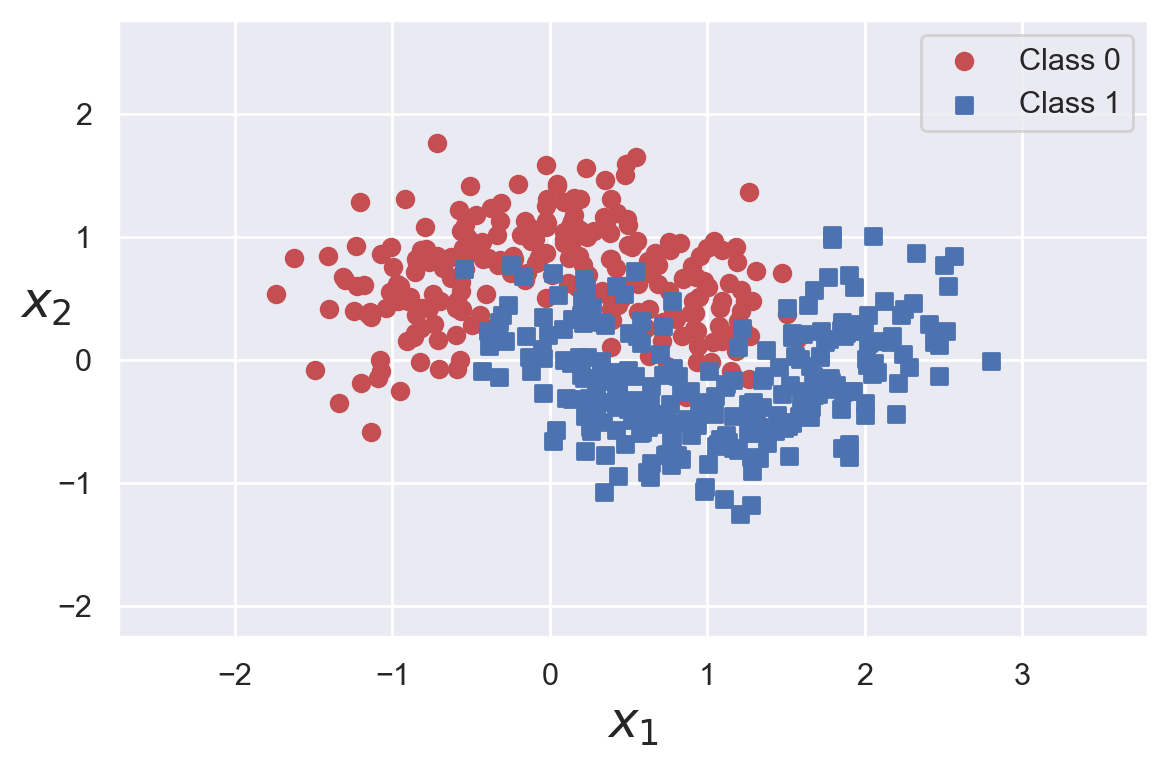

In [94]:
plt.figure(dpi=200)
plt.scatter(X[y == 0, 0], X[y == 0, 1],
            c='r', marker='o', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1],
            c='b', marker='s', label='Class 1')

plt.xlim(X[:, 0].min()-1, X[:, 0].max()+1)
plt.ylim(X[:, 1].min()-1, X[:, 1].max()+1)
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$x_2$', rotation=0, fontsize=18)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver="liblinear", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
svm_clf = SVC(gamma="auto", random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

In [96]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(random_state=42,
                                                 solver='liblinear')),
                             ('rf',
                              RandomForestClassifier(n_estimators=10,
                                                     random_state=42)),
                             ('svc', SVC(gamma='auto', random_state=42))])

In [97]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.888
VotingClassifier 0.896


### Bagging and Pasting

In [98]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [99]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.904


In [113]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.6883116883116883


### __Random Forests__

In [101]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.11249225099876375
sepal width (cm) 0.02311928828251033
petal length (cm) 0.4410304643639577
petal width (cm) 0.4233579963547682


In [102]:
rnd_clf.feature_importances_

array([0.11249225, 0.02311929, 0.44103046, 0.423358  ])

In [ ]:
#RANDOM forest